In [2]:
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

import plotly.graph_objects as go
import warnings
import numpy as np
import pandas as pd

import statsmodels.api as sm

warnings.filterwarnings('ignore')

In [3]:
expert_score = pd.read_excel('Data/min-max 성과점수.xlsx').iloc[1:,1:]
expert_score

,판매자,판매수,총판매금액,평균평점,고유카테고리수,고유고객수,고객재구매수,평균단가,재구매율,성과점수,서비스수,예측_성과점수,예측_금액기반성과점수_만,금액기반성과점수_만,총판매금액_만,예측_성과점수_스케일,실제_성과점수_스케일
1,0to1,16,111800,5.000000,1,16,0,6987.500000,0.000000,80.0,1,80.240000,73.268732,55.900000,11.180,0.182808,0.077936
2,100ME,409,38280700,5.000000,1,403,6,93595.843521,0.014888,2045.0,2,1959.868859,18833.061062,19140.350000,3828.070,26.753488,26.685547
3,10xDeveloper,172,4585920,4.941860,2,172,0,26662.325581,0.000000,850.0,2,808.940000,2183.742108,2266.297674,458.592,3.172005,3.159681
4,10년차웹개발자,153,3948860,4.842484,1,153,0,25809.542484,0.000000,740.9,3,702.890000,1893.918400,1912.229003,394.886,2.761509,2.666037
5,123abc,1,179700,0.000000,1,1,0,179700.000000,0.000000,0.0,1,8.690000,110.294036,0.000000,17.970,0.235250,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,효베르,1509,22518790,5.000000,1,1479,30,14922.988734,0.020284,7545.0,1,7229.696045,11248.955890,11259.395000,2251.879,16.011640,15.697890
2062,효율자동화쟁이,3,30000,5.000000,1,3,0,10000.000000,0.000000,15.0,1,18.230000,31.723900,15.000000,3.000,0.123966,0.020913
2063,흐,3,176600,3.700000,1,3,0,58866.666667,0.000000,11.1,1,18.230000,105.262174,65.342000,17.660,0.228123,0.091100
2064,희몽,5,50000,5.000000,1,5,0,10000.000000,0.000000,25.0,1,27.770000,41.773140,25.000000,5.000,0.138199,0.034855


In [7]:
expert_df = pd.read_csv('Data/Expert_Data.csv')
expert_df

,판매자ID,판매자,판매 서비스 수,총 판매 금액,프리미엄 서비스 가입여부,신속 알람 서비스 사용여부
0,V2_0,김러그,326,147927420,가입,미사용
1,V2_1,디프라이,43,146832200,가입,미사용
2,V2_2,Sailorkr,14,140029000,가입,미사용
3,V2_3,신뢰할만한지식인65,16,130713200,가입,미사용
4,V2_4,에픽핫,18,126229400,가입,미사용
...,...,...,...,...,...,...
2061,V2_2061,web3expert,1,7800,미가입,미사용
2062,V2_2062,enos,2,6950,미가입,미사용
2063,V2_2063,K9027456501,1,5000,미가입,미사용
2064,V2_2064,승쿠딩,1,5000,가입,미사용


# 전문가 그룹별 차이 확인

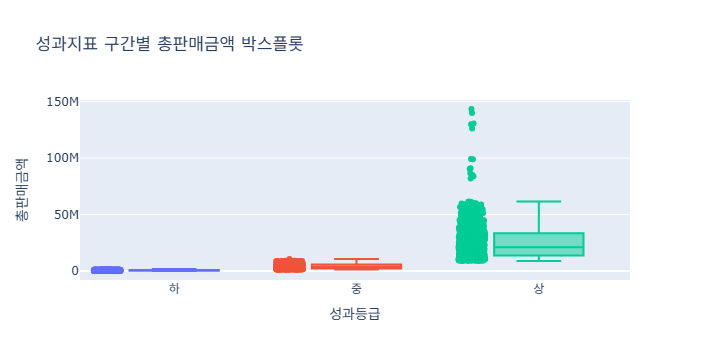

In [5]:
import plotly.express as px

score_col = '예측_성과점수_스케일'
amount_col = '총판매금액'

# 성과점수 3등분 (quantile 기준)
expert_score['성과등급'] = pd.qcut(expert_score[score_col], q=3, labels=['하', '중', '상'])

# 박스플롯 시각화
fig = px.box(
    expert_score,
    x='성과등급',
    y=amount_col,
    color='성과등급',
    title='성과지표 구간별 총판매금액 박스플롯',
    category_orders={'성과등급': ['하', '중', '상']},
    points='all'  # 이상치 점 표시
)

fig.update_layout(
    xaxis_title='성과등급',
    yaxis_title='총판매금액',
    showlegend=False
)

fig.show()


In [15]:
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

high_sales = expert_score[expert_score['성과등급'] == '상']['총판매금액']
mid_sales = expert_score[expert_score['성과등급'] == '중']['총판매금액']
low_sales = expert_score[expert_score['성과등급'] == '하']['총판매금액']

# ANOVA 검정
f_stat, p_val = stats.f_oneway(high_sales, mid_sales, low_sales)
print("=== ANOVA 결과 (판매금액) ===")
print(f"F-statistic: {f_stat:.4f}")
print(f"p-value: {p_val:.4e}")

if p_val < 0.05:
    print("\n-> 세 그룹 간 평균에 유의미한 차이가 있습니다. (사후검정 결과)")
    sales_data = pd.concat([
        pd.DataFrame({'총판매금액': high_sales, 'group': '상위 그룹'}),
        pd.DataFrame({'총판매금액': mid_sales, 'group': '중위 그룹'}),
        pd.DataFrame({'총판매금액': low_sales, 'group': '하위 그룹'})
    ], ignore_index=True)
    
    tukey = pairwise_tukeyhsd(endog=sales_data['총판매금액'],
                              groups=sales_data['group'],
                              alpha=0.05)
    print(tukey)
else:
    print("\n-> 세 그룹 간 평균 차이가 통계적으로 유의하지 않습니다.")


=== ANOVA 결과 (판매금액) ===
F-statistic: 1254.9897
p-value: 0.0000e+00

-> 세 그룹 간 평균에 유의미한 차이가 있습니다. (사후검정 결과)
          Multiple Comparison of Means - Tukey HSD, FWER=0.05          
group1 group2    meandiff    p-adj     lower          upper      reject
-----------------------------------------------------------------------
 상위 그룹  중위 그룹 -21936483.9531   0.0 -23233070.7166 -20639897.1895   True
 상위 그룹  하위 그룹 -25622244.3895   0.0 -26919301.8689 -24325186.9102   True
 중위 그룹  하위 그룹  -3685760.4365   0.0     -4982347.2   -2389173.673   True
-----------------------------------------------------------------------


# 전체 변수 히트맵 

In [8]:
expert_df = pd.merge(expert_score,expert_df, on='판매자',how='inner')

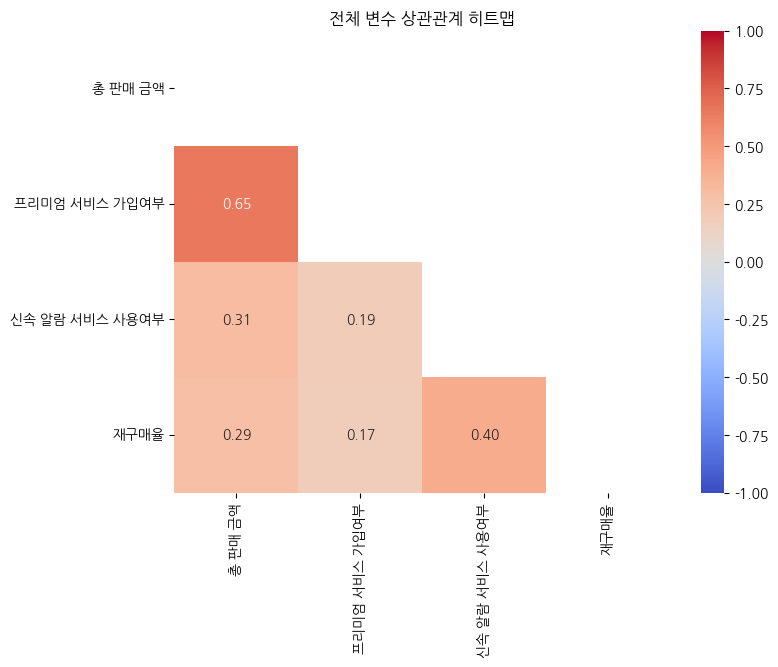

In [16]:
cols_mod = ['총 판매 금액', '프리미엄 서비스 가입여부',
            '신속 알람 서비스 사용여부', '재구매율']

analysis_df = expert_df.copy()[cols_mod]

analysis_df['프리미엄 서비스 가입여부'] = analysis_df['프리미엄 서비스 가입여부'].map({'가입': 1, '미가입': 0})
analysis_df['신속 알람 서비스 사용여부'] = analysis_df['신속 알람 서비스 사용여부'].map({'사용': 1, '미사용': 0})

corr_matrix = analysis_df.corr(method='pearson')

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))


plt.figure(figsize=(8, 6))
ax = sns.heatmap(
    corr_matrix, 
    mask=mask, 
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm", 
    vmin=-1, vmax=1
)

plt.title("전체 변수 상관관계 히트맵")
plt.show()


## 전문가 그룹별 프리미엄 서비스 

In [17]:
top = expert_df[expert_df['성과등급'] == '상']
mid = expert_df[expert_df['성과등급'] == '중']
low = expert_df[expert_df['성과등급'] == '하']

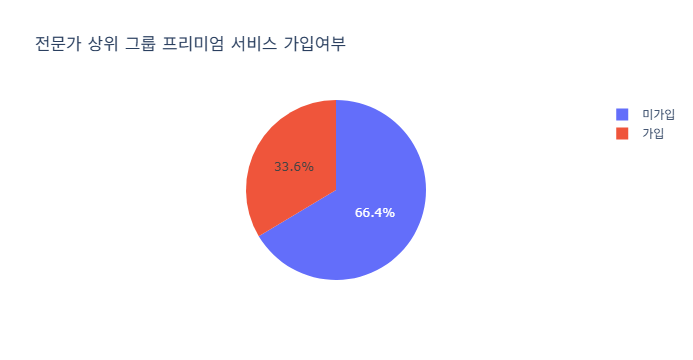

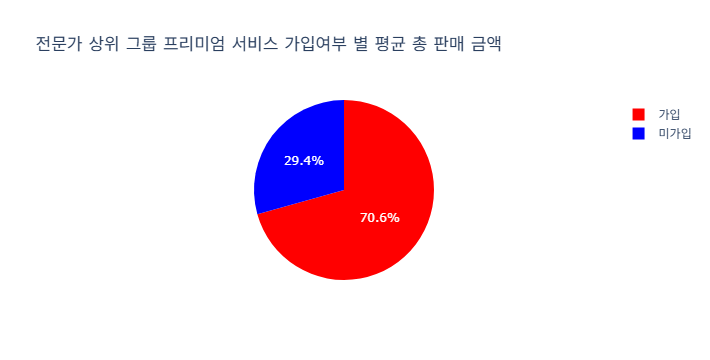

In [19]:
pie = top['프리미엄 서비스 가입여부'].value_counts()
A = go.Pie(labels = pie.index,
            values= pie)

data = [A]
layout = go.Layout(title = '전문가 상위 그룹 프리미엄 서비스 가입여부')
fig = go.Figure(data,layout)
fig.show()


pie = top.groupby('프리미엄 서비스 가입여부')['총 판매 금액'].mean()

color_mapping = {"가입": "red", "미가입": "blue"}
colors = [color_mapping.get(label, "gray") for label in pie.index]

A = go.Pie(
    labels=pie.index,
    values=pie,
    marker=dict(colors=colors)
)

data = [A]
layout = go.Layout(title='전문가 상위 그룹 프리미엄 서비스 가입여부 별 평균 총 판매 금액')
fig = go.Figure(data=data, layout=layout)
fig.show()


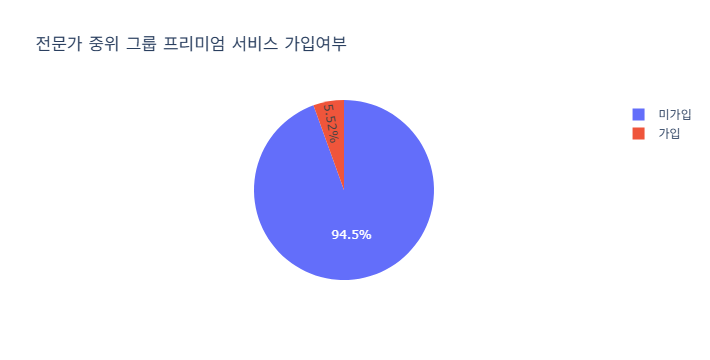

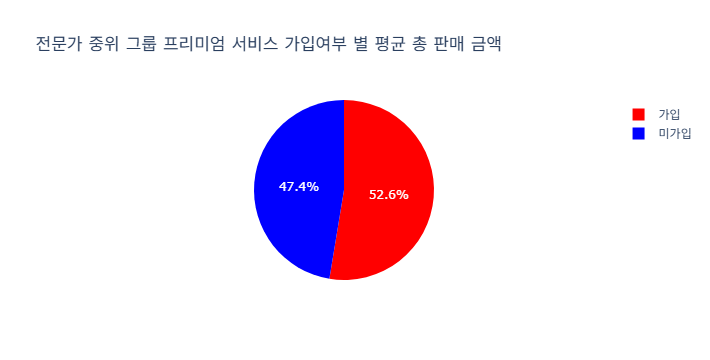

In [20]:
pie = mid['프리미엄 서비스 가입여부'].value_counts()
A = go.Pie(labels = pie.index,
            values= pie)

data = [A]
layout = go.Layout(title = '전문가 중위 그룹 프리미엄 서비스 가입여부')
fig = go.Figure(data,layout)
fig.show()

pie = mid.groupby('프리미엄 서비스 가입여부')['총 판매 금액'].mean()

color_mapping = {"가입": "red", "미가입": "blue"}
colors = [color_mapping.get(label, "gray") for label in pie.index]

A = go.Pie(
    labels=pie.index,
    values=pie,
    marker=dict(colors=colors)
)

data = [A]
layout = go.Layout(title='전문가 중위 그룹 프리미엄 서비스 가입여부 별 평균 총 판매 금액')
fig = go.Figure(data=data, layout=layout)
fig.show()


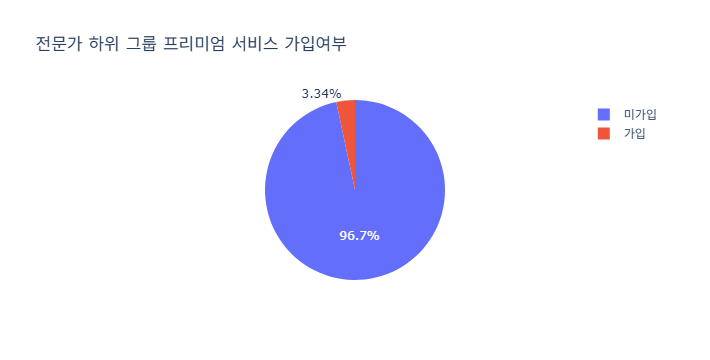

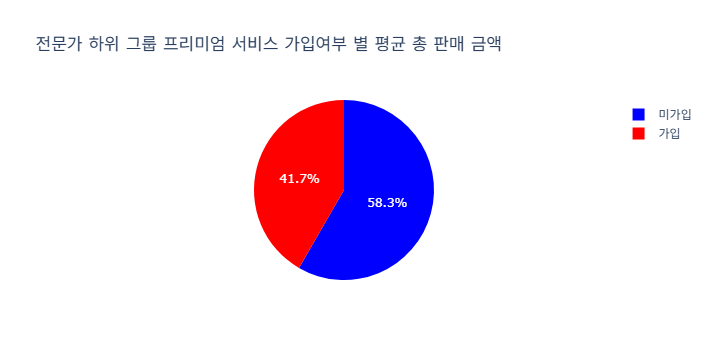

In [21]:
pie = low['프리미엄 서비스 가입여부'].value_counts()
A = go.Pie(labels = pie.index,
            values= pie)

data = [A]
layout = go.Layout(title = '전문가 하위 그룹 프리미엄 서비스 가입여부')
fig = go.Figure(data,layout)
fig.show()

pie = low.groupby('프리미엄 서비스 가입여부')['총 판매 금액'].mean()

color_mapping = {"가입": "red", "미가입": "blue"}
colors = [color_mapping.get(label, "gray") for label in pie.index]

A = go.Pie(
    labels=pie.index,
    values=pie,
    marker=dict(colors=colors)
)

data = [A]
layout = go.Layout(title='전문가 하위 그룹 프리미엄 서비스 가입여부 별 평균 총 판매 금액')
fig = go.Figure(data=data, layout=layout)
fig.show()


## 전문가 그룹별 신속 알람 서비스

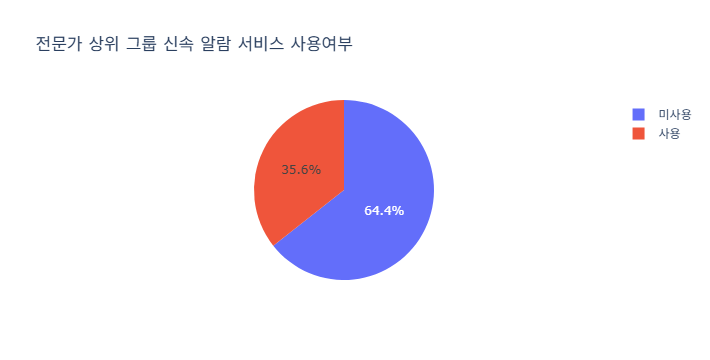

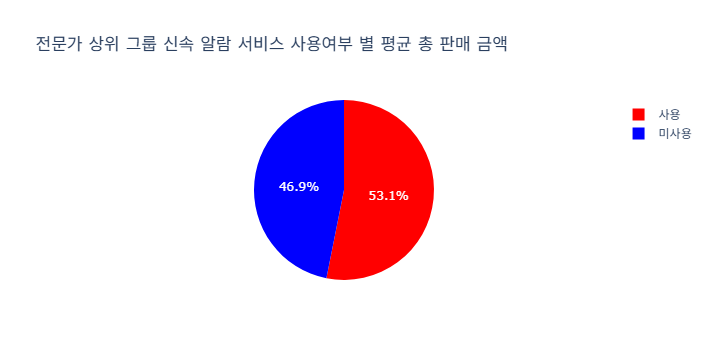

In [22]:
pie = top['신속 알람 서비스 사용여부'].value_counts()
A = go.Pie(labels = pie.index,
            values= pie)

data = [A]
layout = go.Layout(title = '전문가 상위 그룹 신속 알람 서비스 사용여부')
fig = go.Figure(data,layout)
fig.show()

pie = top.groupby('신속 알람 서비스 사용여부')['총 판매 금액'].mean()

color_mapping = {"사용": "red", "미사용": "blue"}
colors = [color_mapping.get(label, "gray") for label in pie.index]

# 파이 차트 생성
A = go.Pie(
    labels=pie.index,
    values=pie,
    marker=dict(colors=colors)
)

data = [A]
layout = go.Layout(title='전문가 상위 그룹 신속 알람 서비스 사용여부 별 평균 총 판매 금액')
fig = go.Figure(data=data, layout=layout)
fig.show()


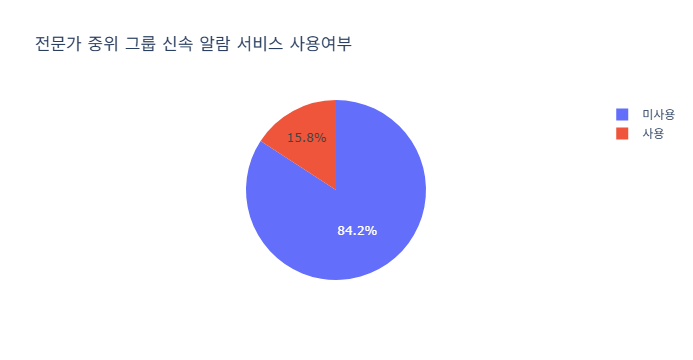

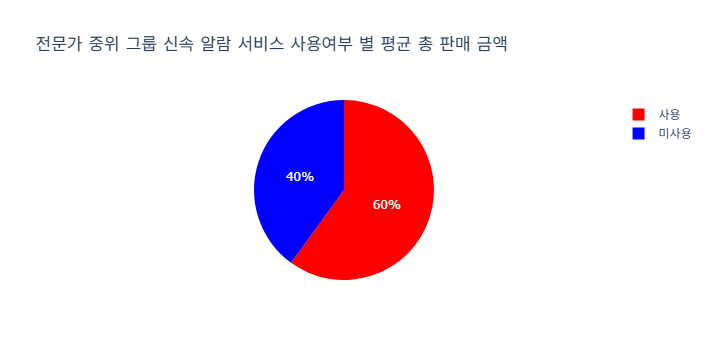

In [23]:
pie = mid['신속 알람 서비스 사용여부'].value_counts()
A = go.Pie(labels = pie.index,
            values= pie)

data = [A]
layout = go.Layout(title = '전문가 중위 그룹 신속 알람 서비스 사용여부')
fig = go.Figure(data,layout)
fig.show()

pie = mid.groupby('신속 알람 서비스 사용여부')['총 판매 금액'].mean()

color_mapping = {"사용": "red", "미사용": "blue"}
colors = [color_mapping.get(label, "gray") for label in pie.index]

A = go.Pie(
    labels=pie.index,
    values=pie,
    marker=dict(colors=colors)
)

data = [A]
layout = go.Layout(title='전문가 중위 그룹 신속 알람 서비스 사용여부 별 평균 총 판매 금액')
fig = go.Figure(data=data, layout=layout)
fig.show()


# 타회사 데이터 확인

In [24]:
company_df = pd.read_excel('Data/company_df.xlsx')
company_df

,서비스명,가격,카테고리,회사
0,홈페이지 제작 – 압도적인 퀄리티 꼼꼼한 완성도,880000.0,홈페이지,크몽
1,"전문가가 제작하는 반응형 홈페이지 제작,고퀄리티 디자인",440000.0,홈페이지,크몽
2,"반응형 홈페이지, 최적의 SEO적용 완벽하고 빠른 제작",1210000.0,홈페이지,크몽
3,크몽어워즈수상 홈페이지 맞춤제작 주식회사 드림위드컴퍼니,990000.0,홈페이지,크몽
4,3년 연속 크몽어워즈수상ㅣ맞춤 반응형 홈페이지 제작,1320000.0,홈페이지,크몽
...,...,...,...,...
15377,헬스케어 Android 앱/웹 개발 및 영상 서버 구축,30000000.0,홈페이지,위시캣
15378,사진/영상 투표 시연용 웹 구축,2000000.0,홈페이지,위시캣
15379,운영 중인 쇼핑몰의 통합 관리 솔루션 설계/개발,30000000.0,홈페이지,위시캣
15380,웹 기반 이미지 에디터 프론트엔드 개발,12000000.0,홈페이지,위시캣


In [25]:
k_df = company_df[company_df['회사'] == '크몽']
w_df = company_df[company_df['회사'] == '위시캣']

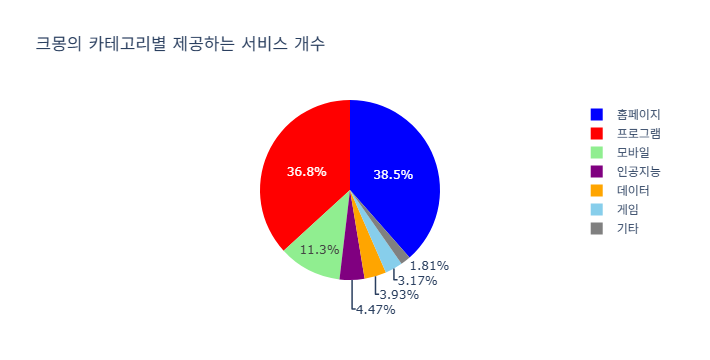

In [26]:
pie = k_df['카테고리'].value_counts()

color_mapping = {
    "홈페이지": "#0000FF",    # blue
    "프로그램": "#FF0000",    # red
    "프로그래밍": "#008000",   # green 
    "모바일": "#90EE90",      # light green
    "인공지능": "#800080",    # purple
    "디자인": "#FF69B4",      # hot pink 
    "기획": "#A52A2A",        # brown  
    "데이터": "#FFA500",      # orange
    "게임": "#87CEEB",        # sky blue
    "커머스": "#FFC0CB",      # pink
    "기타": "#808080"         # gray
}


colors = [color_mapping.get(label, "gray") for label in pie.index]

A = go.Pie(
    labels=pie.index,
    values=pie,
    marker=dict(colors=colors)
)


data = [A]
layout = go.Layout(title = '크몽의 카테고리별 제공하는 서비스 개수')
fig = go.Figure(data,layout)
fig.show()


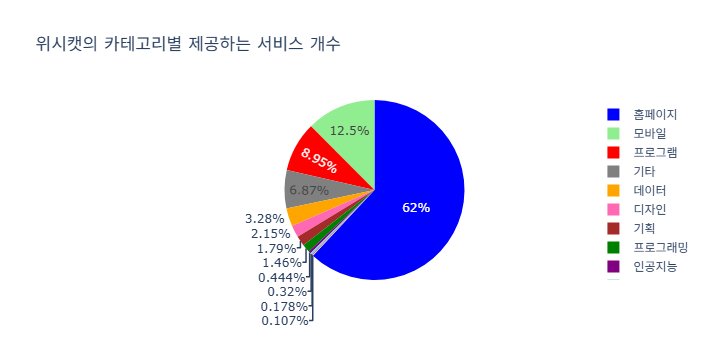

In [28]:
pie = w_df['카테고리'].value_counts()

color_mapping = {
    "홈페이지": "#0000FF",    # blue
    "프로그램": "#FF0000",    # red
    "프로그래밍": "#008000",   # green 
    "모바일": "#90EE90",      # light green
    "인공지능": "#800080",    # purple
    "디자인": "#FF69B4",      # hot pink 
    "기획": "#A52A2A",        # brown 
    "데이터": "#FFA500",      # orange
    "게임": "#87CEEB",        # sky blue
    "커머스": "#FFC0CB",      # pink
    "기타": "#808080"         # gray
}
colors = [color_mapping.get(label, "gray") for label in pie.index]

A = go.Pie(
    labels=pie.index,
    values=pie,
    marker=dict(colors=colors)
)


data = [A]
layout = go.Layout(title = '위시캣의 카테고리별 제공하는 서비스 개수')
fig = go.Figure(data,layout)
fig.show()


In [32]:
L_cate = pd.read_excel('Data/compL_cate.xlsx')
del L_cate['Unnamed: 0']

In [34]:
L_cate

,대분류,count
0,홈페이지,124007
1,데이터,61680
2,기타,44769
3,프로그래밍,32758
4,커머스,26802
5,프로그램,24973
6,모바일,15972
7,디자인,4235
8,기획,3930
9,게임,3026


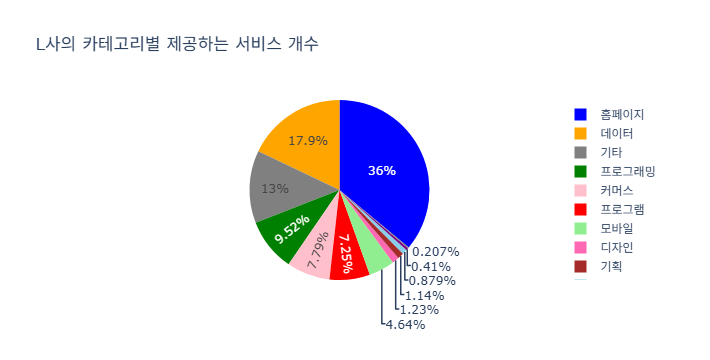

In [37]:
pie = L_cate
 
color_mapping = {
    "홈페이지": "#0000FF",    # blue
    "프로그램": "#FF0000",    # red
    "프로그래밍": "#008000",   # green 
    "모바일": "#90EE90",      # light green
    "인공지능": "#800080",    # purple
    "디자인": "#FF69B4",      # hot pink 
    "기획": "#A52A2A",        # brown 
    "데이터": "#FFA500",      # orange
    "게임": "#87CEEB",        # sky blue
    "커머스": "#FFC0CB",      # pink
    "기타": "#808080"         # gray
}
colors = [color_mapping.get(label, "gray") for label in pie['대분류']]

 
A = go.Pie(
    labels=pie['대분류'],
    values=pie['count'],
    marker=dict(colors=colors)
)


data = [A]
layout = go.Layout(title = 'L사의 카테고리별 제공하는 서비스 개수')
fig = go.Figure(data,layout)
fig.show()
